In [ ]:
import string
import pandas as pd
import numpy as np
from scipy.stats import mode
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/electronic.csv')
df = data.rename(columns={'review_rating': 'label', 'review_text': 'sentence'})
df.label = df.label.astype(int)
df = df.dropna()
df.head()

,sentence,label
0,Iphone 7 is just great! I bought it from amazo...,4
1,"Good size for daily usage. No back glass, no w...",5
2,I still using this phone (iphone 7 32 GB) sinc...,5
3,"This is my 1st iPhone , got it more for busine...",5
4,"From the time I bought the iPhone 7, it shut o...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7471751 entries, 0 to 7479488
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   sentence  object
 1   label     int64 
dtypes: int64(1), object(1)
memory usage: 171.0+ MB


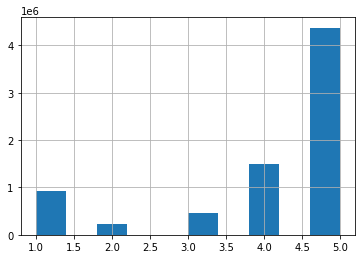

In [ ]:
df.label.hist()

(array([4.9635e+04, 2.5500e+02, 5.4000e+01, 4.4000e+01, 7.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([   6. ,  372.8,  739.6, 1106.4, 1473.2, 1840. , 2206.8, 2573.6,
        2940.4, 3307.2, 3674. ]),
 <a list of 10 Patch objects>)

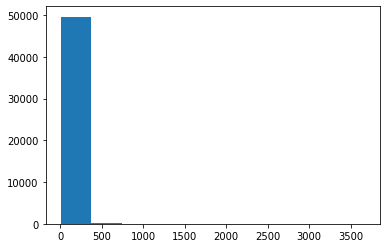

In [ ]:
def cleaning(x):
    x = x.lower()
    words = x.split()
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    return ' '.join(stripped)

df['len'] = df.sentence.apply(lambda x:len(x.split())) 
df = df[df.len>5]

df = pd.concat([ df[df['label']==1.0].head(10000), df[df['label']==2.0].head(10000), df[df['label']==3.0].head(10000), df[df['label']==4.0].head(10000), df[df['label']==5.0].head(10000)])
df.sentence = df.sentence.apply(lambda x:cleaning(x))

df = shuffle(df)

a = np.unique(df.len,return_counts=True)
dict(zip(list(a[0]),list(a[1])))
plt.hist(df.len)

In [ ]:
len_select = list(filter(lambda x:x<250 ,df.len.values))
np.mean(len_select), np.median(df.len), mode(df.len)[0][0]

(31.194116453641712, 20.0, 6)

We will consider max_length as 40


In [ ]:
df[['sentence','label']].to_csv('selected_electronics.csv',index=False)


In [ ]:
cp /content/selected_electronics.csv /content/drive/My\ Drive/Colab_Notebooks/selected_electronics.csv

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Reviews.csv')
df = data[['Text','Score']].rename(columns={'Score': 'label', 'Text': 'sentence'})
df.label = df.label.astype(int)
df = df.dropna()
df.head()

,sentence,label
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


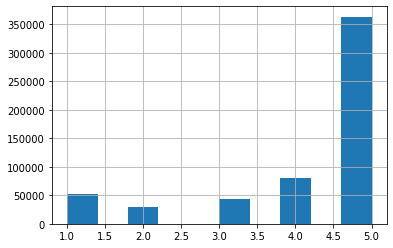

In [ ]:
df.label.hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568454 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sentence  568454 non-null  object
 1   label     568454 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ MB


(array([4.5279e+04, 3.9540e+03, 5.4900e+02, 1.2200e+02, 6.9000e+01,
        1.1000e+01, 1.1000e+01, 1.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([   6. ,  180.5,  355. ,  529.5,  704. ,  878.5, 1053. , 1227.5,
        1402. , 1576.5, 1751. ]),
 <a list of 10 Patch objects>)

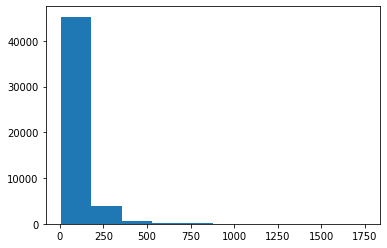

In [ ]:
def cleaning(x):
    x = x.lower()
    words = x.split()
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    return ' '.join(stripped)

df['len'] = df.sentence.apply(lambda x:len(x.split())) 
df = df[df.len>5]

df = pd.concat([ df[df['label']==1.0].head(10000), df[df['label']==2.0].head(10000), df[df['label']==3.0].head(10000), df[df['label']==4.0].head(10000),
df[df['label']==5.0].head(10000)])
df.sentence = df.sentence.apply(lambda x:cleaning(x))


df = shuffle(df)

a = np.unique(df.len,return_counts=True)
dict(zip(list(a[0]),list(a[1])))
plt.hist(df.len)

In [ ]:
len_select = list(filter(lambda x:x<250 ,df.len.values))
np.mean(len_select), np.median(df.len), mode(df.len)[0][0]

(75.78829891633433, 64.0, 22)

We will consider max_length = 80


In [ ]:
df[['sentence','label']].to_csv('selected_foods.csv',index=False)

In [ ]:
cp /content/selected_foods.csv.csv /content/drive/My\ Drive/Colab_Notebooks/selected_foods.csv

cp: cannot stat '/content/selected_foods.csv.csv': No such file or directory


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/selected_electronics.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  50000 non-null  object
 1   label     50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/selected_foods.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  50000 non-null  object
 1   label     50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB
